In [376]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import joblib

## Cargue de datos 

In [295]:
train = pd.read_csv("s3://claseelectiva2mao/datos/train")
test = pd.read_csv("s3://claseelectiva2mao/datos/test")

## Creacion del pipeline

In [296]:
numeric_pipeline = Pipeline(
    [
        ('imputacion con la media', SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
    ]
)

In [297]:
category_pipeline = Pipeline(
    [
        ('imputacion con la moda', SimpleImputer(strategy='most_frequent')),
        ('Codificar', OneHotEncoder(sparse=False))
    ]
)

In [298]:
column_transformer = ColumnTransformer(
    [
        ('numeric_pipeline', numeric_pipeline, [0, 1, 2]),
        ('category_pipeline', category_pipeline, [3,4,5])
    ]

)

In [299]:
features = ["Age", "Credit amount", "Duration", "Sex", "Purpose", "Housing"]

## Seleccion de caracteristicas

In [327]:
train = train.dropna()

In [328]:
X_train = train.drop(["Risk", "Unnamed: 0"], axis=1)

In [329]:
y_train = train["Risk"]

In [353]:
y_train = (y_train == 'good').astype('int')

In [331]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


## Imporrtancia de caracteristicas 

In [332]:
X_train = pd.get_dummies(X_train)

In [333]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,36,1,4241,24,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,35,3,6948,36,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,24,2,2145,36,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10,30,2,639,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,26,2,4788,48,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
693,36,2,1275,24,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
694,37,1,1274,12,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [334]:
model = DecisionTreeClassifier()

In [335]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [336]:
model.feature_importances_

array([0.12473664, 0.04626751, 0.32030394, 0.19541785, 0.0257066 ,
       0.01587798, 0.01870899, 0.0056199 , 0.02397041, 0.0093665 ,
       0.02496006, 0.01864187, 0.01925574, 0.02692351, 0.02341626,
       0.00599456, 0.        , 0.0610696 , 0.        , 0.00760165,
       0.01788384, 0.        , 0.00827658, 0.        ])

In [337]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

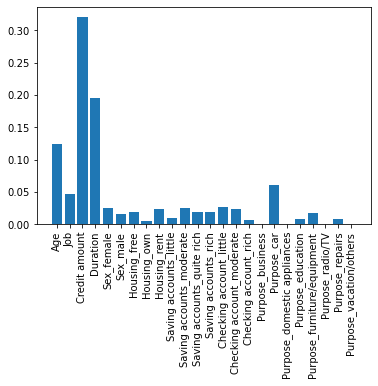

In [338]:
plt.bar(x = X_train.columns, height = model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()
#variables mas relevantes en la prediccion 

In [339]:

order_columns = X_train.columns[np.argsort(model.feature_importances_, )[::-1]]

order_importances = np.sort(model.feature_importances_)[::-1]

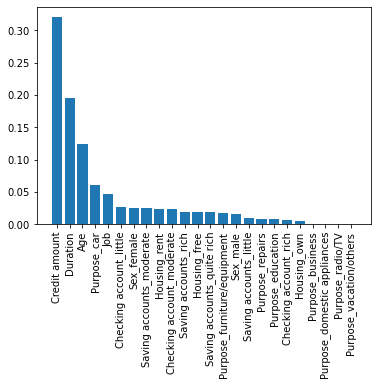

In [340]:
plt.bar(x = order_columns, height = order_importances)
plt.xticks(rotation = 90)
plt.show()

## Regresion logistica

In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [343]:
model = LogisticRegression()

In [344]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [345]:
model.coef_

array([[ 0.47424606,  0.46040332, -0.92624159, -2.03116232, -0.19687034,
         0.19696162,  0.06881668,  0.14613817, -0.21486357, -0.46689979,
        -0.41031105,  0.29891103,  0.57839108, -0.38283643, -0.16388134,
         0.54680905,  0.28173634,  0.11494351, -0.14531633, -0.93147024,
         0.17853055,  0.27162217,  0.07962265,  0.15042262]])

In [346]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

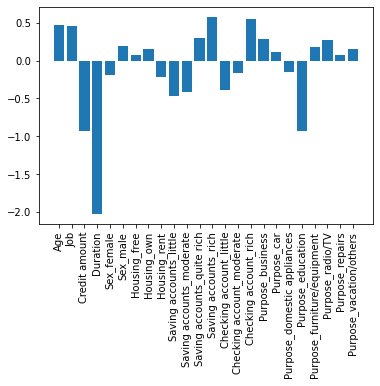

In [347]:
plt.bar(x = X_train.columns, height = model.coef_[0]) 
plt.xticks(rotation = 90)
plt.show()

## Validacion Cruzada

In [354]:
evaluation_pipeline = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(arbol)', DecisionTreeClassifier(max_depth=3))
    ]
)

In [355]:
X_train = train[features]

In [356]:
results = cross_validate(evaluation_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

In [357]:
print("train: ", results['train_accuracy'].mean(),"+-", results['train_accuracy'].std())
print("validation: ", results['test_accuracy'].mean(),"+-", results['test_accuracy'].std())


train:  0.6743570750237416 +- 0.010504688830760682
validation:  0.6313063063063064 +- 0.07450946849313422


In [366]:
regression_pipeline = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(regression)', LogisticRegression())
    ]
)

In [367]:
results_2 = cross_validate(regression_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

In [368]:
print("train: ", results_2['train_accuracy'].mean(),"+-", results['train_accuracy'].std())
print("validation: ", results_2['test_accuracy'].mean(),"+-", results['test_accuracy'].std())

train:  0.6509734093067426 +- 0.010504688830760682
validation:  0.6234234234234235 +- 0.07450946849313422


In [380]:
randfor_pipeline = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(arbol aleatorio)', RandomForestClassifier(max_depth=3))
    ]
)

In [381]:
results_3 = cross_validate(randfor_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

In [382]:
print("train: ", results_3['train_accuracy'].mean(),"+-", results['train_accuracy'].std())
print("validation: ", results_3['test_accuracy'].mean(),"+-", results['test_accuracy'].std())

train:  0.6925194681861349 +- 0.010504688830760682
validation:  0.6317567567567568 +- 0.07450946849313422


In [383]:
evaluation_pipeline_svm = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(SVM)', SVC())
    ]
)

In [443]:
results_4 = cross_validate(evaluation_pipeline_svm, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

In [444]:
print("train: ", results_4['train_accuracy'].mean(),"+-", results['train_accuracy'].std())
print("validation: ", results_4['test_accuracy'].mean(),"+-", results['test_accuracy'].std())

train:  0.6952905982905981 +- 0.010504688830760682
validation:  0.6426426426426427 +- 0.07450946849313422


In [445]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 

In [446]:
evaluation_pipeline_etc = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(etc)', ExtraTreesClassifier(max_depth=3))
    ]
)

In [447]:
results_5 = cross_validate(evaluation_pipeline_etc, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

In [448]:
print("train: ", results_5['train_accuracy'].mean(),"+-", results['train_accuracy'].std())
print("validation: ", results_5['test_accuracy'].mean(),"+-", results['test_accuracy'].std())

train:  0.6799012345679012 +- 0.010504688830760682
validation:  0.6094594594594595 +- 0.07450946849313422


In [449]:
evaluation_pipeline_gbr = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(etc)', GradientBoostingRegressor())
    ]
)

In [450]:
#results_6 = cross_validate(evaluation_pipeline_gbr, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy', 'f1'])

## Ajuuste de hiperparametros

In [451]:
# PROBAR 50 ARBOLES, 100 ARBOLES, 200 ARBOLES, ALTURAS: 2,3,5,10

In [460]:
grid = {'max_depth' : [2, 3, 5, 10], 'n_estimators': [50, 100, 200]}

In [461]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv = 10, scoring='accuracy')

In [462]:
X_train_transform = column_transformer.fit_transform(X_train)


In [463]:
grid_search.fit(X_train_transform, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [464]:
grid_search.best_score_

0.648048048048048

In [465]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [466]:
grid_search.cv_results_

{'mean_fit_time': array([0.06348403, 0.10528967, 0.20158722, 0.05467069, 0.10393698,
        0.20781355, 0.05769482, 0.1075372 , 0.2156177 , 0.05857201,
        0.1165199 , 0.23081977]),
 'std_fit_time': array([0.00720176, 0.00823637, 0.00249035, 0.00402982, 0.00174347,
        0.0061198 , 0.00503797, 0.00179479, 0.00341129, 0.00146726,
        0.0030983 , 0.00469498]),
 'mean_score_time': array([0.00563159, 0.00771534, 0.01463187, 0.00428743, 0.00742784,
        0.01463149, 0.00417192, 0.00751724, 0.01490197, 0.0042484 ,
        0.00832007, 0.01481578]),
 'std_score_time': array([2.65896312e-03, 8.46833052e-04, 1.59352446e-03, 4.99721210e-04,
        8.29057338e-05, 1.16250438e-03, 6.35896856e-05, 8.63403316e-05,
        1.62241125e-03, 5.48882290e-05, 1.39281721e-03, 1.00221056e-04]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False]

## ENTRENAMIENTO FINAL 

In [467]:
final_pipeline = Pipeline(
    [
        ('Pipeline de procesamemiento',column_transformer),
        ('Modelo de prediccion(arbol aleatorio)', RandomForestClassifier(max_depth=5, n_estimators=50))
    ]
)

In [468]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Pipeline de procesamemiento',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('imputacion '
                                                                   'con la '
                                                                   'media',
                                                                   SimpleImputer()),
                                                                  ('Escalado '
                                                                   'minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2]),
                                                 ('category_pipeline',
                                                  Pipeline(steps=[('imputacion '
                                                                   'con la '
                              

In [471]:
joblib.dump(final_pipeline, 'model.joblib')

['model.joblib']